
<h1><b><i><font color='blue'>____________________________MACHINE LEARNING PROJECT (^_^)________________________</font></i></b></h1>


<center><h2><b><i><font color='red'><U>>>>>>Salary Prediction using Linear Regression Model<<<<<<</font></i></b></h2>

In [1]:
#Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Reading Dataset
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
path = '/content/drive/MyDrive/MLProject/Salary.csv'
dataset = pd.read_csv(path)
print("Dataset : \n")
print(dataset)

Mounted at /content/drive
Dataset : 

    YearsExperience  Salary
0               1.1   39343
1               1.3   46205
2               1.5   37731
3               2.0   43525
4               2.2   39891
5               2.9   56642
6               3.0   60150
7               3.2   54445
8               3.2   64445
9               3.7   57189
10              3.9   63218
11              4.0   55794
12              4.0   56957
13              4.1   57081
14              4.5   61111
15              4.9   67938
16              5.1   66029
17              5.3   83088
18              5.9   81363
19              6.0   93940
20              6.8   91738
21              7.1   98273
22              7.9  101302
23              8.2  113812
24              8.7  109431
25              9.0  105582
26              9.5  116969
27              9.6  112635
28             10.3  122391
29             10.5  121872
30             11.2  127345
31             11.5  126756
32             12.3  128765
33        

In [3]:
# Data Preprocessing

#Removing Empty rows
dataset.dropna(inplace=True)

#Removing duplicate rows
dup = dataset.duplicated()
if dup.any():
    dataset=dataset.drop_duplicates()
else:
    print("No Duplicate")

#Handling NAN(NOT A NUMBER) values
nan=dataset['Salary'].isnull()
if nan.any():
    average=dataset['Salary'].mean()
    dataset=dataset.fillna(average)
else:
    print("No NAN Values")

No Duplicate
No NAN Values


In [4]:
# Displaying dataset description
print("Dataset Descrition : \n")
print(dataset.describe())

Dataset Descrition : 

       YearsExperience         Salary
count        35.000000      35.000000
mean          6.308571   83945.600000
std           3.618610   32162.673003
min           1.100000   37731.000000
25%           3.450000   57019.000000
50%           5.300000   81363.000000
75%           9.250000  113223.500000
max          13.500000  139465.000000


In [5]:
# Displaying dataset information
print("Dataset Information : \n")
print(dataset.info())

Dataset Information : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes
None


In [6]:
# Dimension of dataset(Rows,Columns)
print("Dataset Dimension : \n")
#print(len(dataset))
print(dataset.shape)

Dataset Dimension : 

(35, 2)


In [9]:
#Splitting dataset into Dependent and Independent variables / Feature Selection
X = dataset[['YearsExperience']]
Y = dataset['Salary']
print("Features (X):")
print(X.head())
print("X Dimension :",X.shape)

print("\nLabels (Y):")
print(Y.head())
print("Y Dimension :",Y.shape)

Features (X):
   YearsExperience
0              1.1
1              1.3
2              1.5
3              2.0
4              2.2
X Dimension : (35, 1)

Labels (Y):
0    39343
1    46205
2    37731
3    43525
4    39891
Name: Salary, dtype: int64
Y Dimension : (35,)


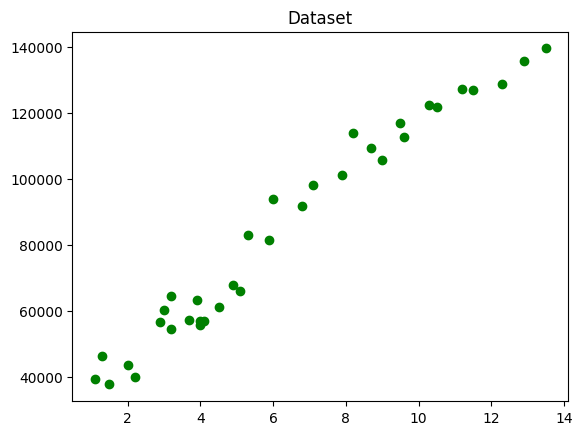

In [10]:
# Plotting data points
# plt.plot(X,Y) # Creating Plot
plt.scatter(X,Y, color='green')
plt.title('Dataset')
plt.show() # Displaying Plot

In [11]:
# Splitting training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)

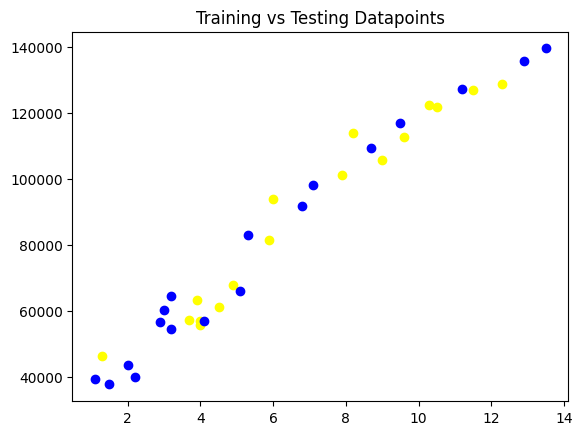

In [12]:
# Plotting data points of training and testing
# plt.plot(X,Y) # Creating Plot
plt.scatter(X_train,Y_train, color='yellow')
plt.scatter(X_test,Y_test, color='blue')
plt.title('Training vs Testing Datapoints')
plt.show() # Displaying Plot

In [13]:
#Implementing Linear Regression
model = LinearRegression()

In [14]:
#Training Model
model.fit(X_train, Y_train)

LinearRegression()

In [15]:
# Predicting for testing
Y_pred = model.predict(X_test)
print("Predicted :\n")
print(Y_pred)

Predicted :

[ 53841.27437144 142041.91010246  47667.22987027 147333.94824632
  56487.29344337 112053.69395391  64425.35065916  56487.29344337
  45903.21715565  73245.41423226  37965.15993985  41493.18536909
  88239.52230654 104997.64309543  75009.42694688  54723.28072875
  90885.54137847 127047.80202818]


In [16]:
# Evaluating model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 31745667.279503305
R-squared: 0.9721337405546958


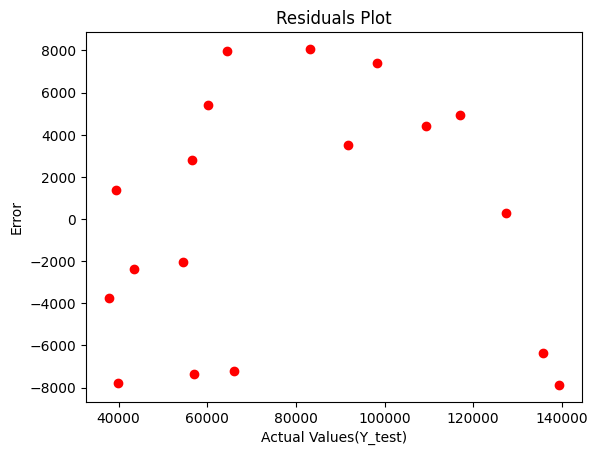

In [17]:
# Plotting Error
Error = Y_test-Y_pred
plt.scatter(Y_test, Error,color='red')
plt.xlabel('Actual Values(Y_test)')
plt.ylabel('Error')
plt.title('Residuals Plot')
plt.show()

In [18]:
# Calculating y=mx+c / Relation between x & y
m = model.coef_[0]
c = model.intercept_
print(f"The Regression Equation is: y = {m}x + {c}")
# Compute y values for the regression line
Y_line = m * X + c

The Regression Equation is: y = 8820.063573102072x + 28263.090009441563


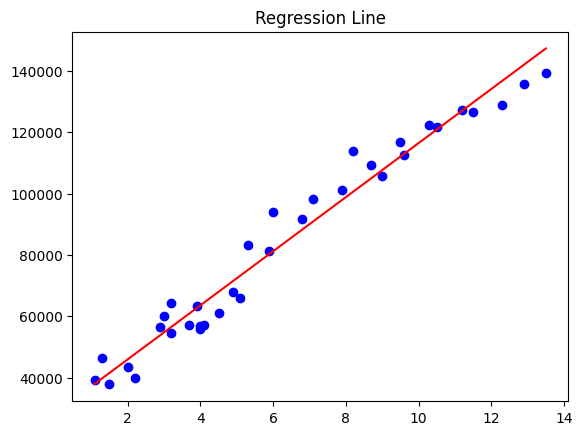

In [19]:
# Plotting Regression line
plt.scatter(X, Y, color='blue') # Plot the entire data
#plt.plot(X,model.predict(X), color='red') # Plotting Regression Line
plt.plot(X,Y_line, color='red')
plt.title('Regression Line')
plt.show()

In [ ]:
# New Predictions
while True:
    print("\n \n\t \t Predict Salary \n")
    print("0_ No \n")
    print("1_Yes \n")
    choice= input("Choice:")
    if(choice=="0"):
        print("Terminated\n")
        break
    elif (choice=="1"):
        try:
            NewData = float(input("Years Experience: "))
            NewData = np.array(NewData).reshape(-1, 1)
            NewPrediction = model.predict(NewData)
            print("New Prediction:", NewPrediction)
            print("Want to add this to dataset:")
            print("N_ No \nY_Yes")
            select=input("Select :")
            if(select=="Y"):
                # Updating Dataframe
                NewData = NewData[0][0]
                NewPrediction = NewPrediction.astype(int).item()
                NewRow = pd.DataFrame({'YearsExperience': [NewData], 'Salary': [NewPrediction]})
                dataset = pd.concat([dataset, NewRow], ignore_index=True)
                print("New Data Added \n")
                print("Dataset:\n")
                print(dataset)
                #Retraining model after adding new data
                X = dataset[['YearsExperience']]
                Y = dataset['Salary']
                model.fit(X, Y)
        except ValueError:
            print("Invalid input. Please enter a number.")
    else:
        print("Invalid choice")



 
	 	 Predict Salary 

0_ No 

1_Yes 



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


New Prediction: [60015.31887261]
Want to add this to dataset:
N_ No 
Y_Yes
New Data Added 

Dataset:

    YearsExperience  Salary
0               1.1   39343
1               1.3   46205
2               1.5   37731
3               2.0   43525
4               2.2   39891
5               2.9   56642
6               3.0   60150
7               3.2   54445
8               3.2   64445
9               3.7   57189
10              3.9   63218
11              4.0   55794
12              4.0   56957
13              4.1   57081
14              4.5   61111
15              4.9   67938
16              5.1   66029
17              5.3   83088
18              5.9   81363
19              6.0   93940
20              6.8   91738
21              7.1   98273
22              7.9  101302
23              8.2  113812
24              8.7  109431
25              9.0  105582
26              9.5  116969
27              9.6  112635
28             10.3  122391
29             10.5  121872
30             11.2  127345
31

<Axes: title={'center': 'Histogram of Dependent variable (Salary)'}, ylabel='Frequency'>

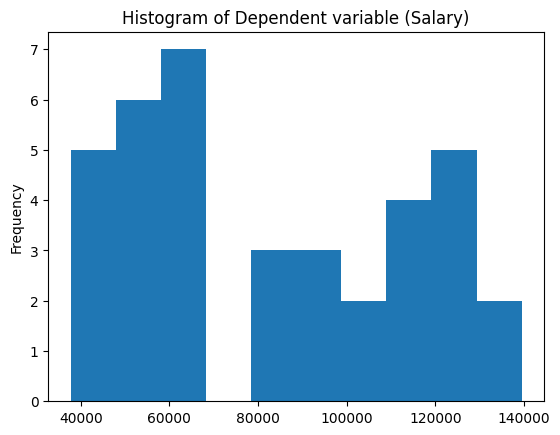

In [ ]:
# Plotting histogram for Salary
plt.title('Histogram of Dependent variable (Salary)')
dataset.Salary.plot(kind='hist')

<Axes: title={'center': 'Histogram of Independent variable (YearsExperience)'}, ylabel='Frequency'>

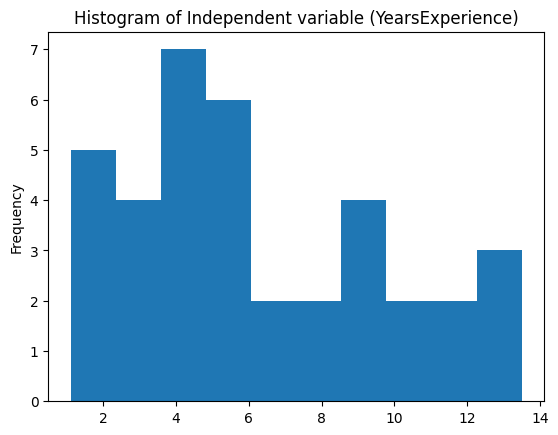

In [ ]:
# Plotting histogram for YearsExperience
plt.title('Histogram of Independent variable (YearsExperience)')
dataset.YearsExperience.plot(kind='hist')